# Load the JSON file that contains the student reviews.

In [2]:
import json
import pandas as pd

In [3]:
json_file = 'data/course_data.json'
with open(json_file,'r') as f:
    data = json.load(f)


data

{'CS 115': {'course_title': 'Introduction to Computer Science 1',
  'num_ratings': '2111',
  'useful': '21%',
  'easy': '10%',
  'liked': '23%',
  'reviews': [{'review_text': 'go to office hours and practice',
    'course_rating': 'liked course'},
   {'review_text': 'One of my least favourite courses. Although things were nicely organized, Racket was such an annoying language to use. The one tangible benefit I felt after using Racket was feeling more comfortable with recursion.',
    'course_rating': 'disliked course'},
   {'review_text': 'It starts with a very low pace but after midterm, it gets really fast and I cannot understand the content while reaching the end of term. Racket is restricted by so many things so I feel I lose the freedom of coding. The assignments are extremely hard after midterm, I spent a whole day on them but I can just solve the easiest one. The only positive impression that I have is that the design recipe weighs half so I pass this course successfully.',
    

In [4]:
data['CS 115']['reviews']

[{'review_text': 'go to office hours and practice',
  'course_rating': 'liked course'},
 {'review_text': 'One of my least favourite courses. Although things were nicely organized, Racket was such an annoying language to use. The one tangible benefit I felt after using Racket was feeling more comfortable with recursion.',
  'course_rating': 'disliked course'},
 {'review_text': 'It starts with a very low pace but after midterm, it gets really fast and I cannot understand the content while reaching the end of term. Racket is restricted by so many things so I feel I lose the freedom of coding. The assignments are extremely hard after midterm, I spent a whole day on them but I can just solve the easiest one. The only positive impression that I have is that the design recipe weighs half so I pass this course successfully.',
  'course_rating': 'disliked course'},
 {'review_text': "Took this in 2018 with no programming experience ever. Started out pretty slow, but I didn't really pay attention

In [5]:
d = []

for course, course_values in data.items():
    for review in course_values['reviews']:
        d.append({
            'course' : course,
            'review_text' : review['review_text'],
            'course_rating' : review['course_rating']
        })
df = pd.DataFrame(d)

# Perform Exploratory Data Analysis (EDA):

In [6]:
print('df shape: ',df.shape)
print('df.info: ')
print(df.info())


df shape:  (14838, 3)
df.info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course         14838 non-null  object
 1   review_text    14838 non-null  object
 2   course_rating  14616 non-null  object
dtypes: object(3)
memory usage: 347.9+ KB
None


In [7]:
print(df.describe())

          course review_text course_rating
count      14838       14838         14616
unique      1974       14696             2
top     MATH 135           .  liked course
freq         253          13          9786


In [8]:
df["course_rating"].isna().value_counts()

course_rating
False    14616
True       222
Name: count, dtype: int64

In [9]:
df = df.dropna(subset=['course_rating'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14616 entries, 0 to 14834
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course         14616 non-null  object
 1   review_text    14616 non-null  object
 2   course_rating  14616 non-null  object
dtypes: object(3)
memory usage: 456.8+ KB


In [11]:
df.tail(50)

course                                        review_text  \
14784     REC 312         Find a good placement & you will be happy!   
14786    REES 260  I took this online with Dr. Vesna Leko. Our fo...   
14787     RS 115R  Interesting and engaging course. There were 8/...   
14788      RS 213  really interesting course, definitely worth ta...   
14789      RS 216  Took it with Doaa. Great introduction to Islam...   
14790      RS 232  Really cool course if you want to take a deep ...   
14791      RS 250  This was a very interesting course blasting th...   
14792      RS 251  Not a class for everyone especially because of...   
14793      RS 283  This is a required course for the SJU Beyond B...   
14794    SDS 358R  VERY EASY COURSE with Professor Dale Payne. Th...   
14795    SDS 440R  Very easy to get a good grade as long as you d...   
14796    SDS 496R  My placement was A+, I was with the Centre for...   
14797     SI 230R  Loved this course. Took it online. We had a li...   
14798     SI 250R  I took this course online and it consisted of ...   
14799     SI 251R  Prof seemed to be novice and said some histori...   
14800     SI 315R  Definitely an interesting and engaging class! ...   
14801     SMF 212  (Took this class online) It's not too difficul...   
14802     SMF 308        pretty good course, get ready to work hard!   
14803     SMF 311  Very engaging course, with 'skills lab', so it...   
14804    SOC 204R  I did this course online and it was okay. Ther...   
14805     SOC 261  The subject material was kind of dry as it dea...   
14806     SOC 326  This is easily one of the best courses I've ta...   
14807     SOC 418  The readings for this course are fairly diffic...   
14808    SPAN 218          Boring but keep up and it should be easy.   
14809    STAT 438  Easy course, but the assignments might not be ...   
14810    STAT 631  The course description is incorrect. R program...   
14811     STV 201  Completely useless, and has lots of heavy (use...   
14812  SWREN 300R  The worst course I've ever taken. The professo...   
14813  SWREN 331R  This. course. was. amazing. Annelies NAILED IT...   
14814  SWREN 414R  This class was fun. It consisted of a values p...   
14815  SWREN 422R  This class does not have a lot of structure to...   
14816  SWREN 423R  This class was good. The textbook is a bit dif...   
14817      WS 347  I loved taking this course! The content is so ...   
14818  SVENT 225P  Svent 225 is a great class to take as a studen...   
14819  SVENT 325P  SVENT 325 is a continuation and expansion of S...   
14820   BUS 461AW  Laurier's JDCC Course - 100% would recommend i...   
14821    BUS 473W                              this is a bird course   
14822    SYDE 548  Taken with Dr MacGregor and Dr Kate Mercer. Pr...   
14823    SYDE 584  I regret taking this course, I took it because...   
14824   PHIL 262J  Was taught the course by the extremely passion...   
14825   PHIL 321J  Unfortunately, I found this course to be meh. ...   
14826    SDS 410R  This course is interesting, important, and uni...   
14827      JS 218  There are a lot of readings, so try to stay on...   
14828     AFM 345  This course is effectively entirely based off ...   
14829     GER 330  Read Tristan and Isolde, a historic love story...   
14830     GSJ 410  This is a really wonderful course! Dr. Fraser ...   
14831     SOC 436  While this course ended up being relatively in...   
14832     BME 588  Personally did not find Computational Biomecha...   
14833    ASL 102R  Took this online with Georgia Whalen. As it wa...   
14834     CS 136L  I either designed or helped design the majorit...   

         course_rating  
14784  disliked course  
14786     liked course  
14787     liked course  
14788     liked course  
14789     liked course  
14790     liked course  
14791     liked course  
14792     liked course  
14793     liked course  
14794     liked course  
14795     liked course  
14796     liked course  
14797     lik

### Count the number of reviews.

In [12]:
print('Number of reviews: ', len(df))

Number of reviews:  14616


### Check the number of Good and Bad reviews.

In [13]:
print('Number of Good and Bad reviews: ', df['course_rating'].value_counts())

Number of Good and Bad reviews:  course_rating
liked course       9786
disliked course    4830
Name: count, dtype: int64


### Analyze the length of the reviews.

In [14]:
df['reviews_length'] = df['review_text'].apply(len)

print('reviews length: ', df['reviews_length'])

reviews length:  0         31
1        214
2        447
3        283
4        281
        ... 
14830    184
14831    592
14832    437
14833    651
14834    173
Name: reviews_length, Length: 14616, dtype: int64


# Apply text preprocessing:

### convert text to lowercase

In [15]:
df['review_text'] = df['review_text'].str.lower()
df['review_text']

0                          go to office hours and practice
1        one of my least favourite courses. although th...
2        it starts with a very low pace but after midte...
3        took this in 2018 with no programming experien...
4        i loved everything about cs 115. great instruc...
                               ...                        
14830    this is a really wonderful course! dr. fraser ...
14831    while this course ended up being relatively in...
14832    personally did not find computational biomecha...
14833    took this online with georgia whalen. as it wa...
14834    i either designed or helped design the majorit...
Name: review_text, Length: 14616, dtype: object

### remove punctuation

In [16]:
import re


def remove_punctuation(text):
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['review_text'] = df['review_text'].apply(remove_punctuation)
df['review_text'].loc[55:120]

55     really easy course especially if you have code...
56     people who like computer science will like thi...
57     great intro course for students with no backgr...
58                          this course tests your logic
59     entrylevel cs course no complicated stuffeasy ...
                             ...                        
116    this course is great for anyone that is intere...
117    as an extremely average student who is not esp...
118    in the beginning of the term this course felt ...
119    incredibly helpful for anyone who wants to dev...
120    the most difficult course in my a really suffered
Name: review_text, Length: 64, dtype: object

### remove stopwords

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/faisalbalkhair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
def remove_stopwords(text):
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

In [19]:
df['review_no_stopwords'] = df['review_text'].apply(remove_stopwords)
df

course                                        review_text  \
0        CS 115                    go to office hours and practice   
1        CS 115  one of my least favourite courses although thi...   
2        CS 115  it starts with a very low pace but after midte...   
3        CS 115  took this in  with no programming experience e...   
4        CS 115  i loved everything about cs  great instructors...   
...         ...                                                ...   
14830   GSJ 410  this is a really wonderful course dr fraser ea...   
14831   SOC 436  while this course ended up being relatively in...   
14832   BME 588  personally did not find computational biomecha...   
14833  ASL 102R  took this online with georgia whalen as it was...   
14834   CS 136L  i either designed or helped design the majorit...   

         course_rating  reviews_length  \
0         liked course              31   
1      disliked course             214   
2      disliked course             447   
3         liked course             283   
4         liked course             281   
...                ...             ...   
14830     liked course             184   
14831     liked course             592   
14832  disliked course             437   
14833     liked course             651   
14834     liked course             173   

                                     review_no_stopwords  
0                               go office hours practice  
1      one least favourite courses although things ni...  
2      starts low pace midterm gets really fast canno...  
3      took programming experience ever started prett...  
4      loved everything cs great instructors fair ass...  
...                                                  ...  
14830  really wonderful course dr fraser easton great...  
14831  course ended relatively interesting unnecessar...  
14832  personally find computational biomechanics use...  
14833  took online georgia whalen asl level two defin...  
14834  either designed helped design majority course ...  

[14616 rows x 5 columns]

### Clean the text data.

In [20]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['review_no_stopwords'].apply(clean_text)
df

course                                        review_text  \
0        CS 115                    go to office hours and practice   
1        CS 115  one of my least favourite courses although thi...   
2        CS 115  it starts with a very low pace but after midte...   
3        CS 115  took this in  with no programming experience e...   
4        CS 115  i loved everything about cs  great instructors...   
...         ...                                                ...   
14830   GSJ 410  this is a really wonderful course dr fraser ea...   
14831   SOC 436  while this course ended up being relatively in...   
14832   BME 588  personally did not find computational biomecha...   
14833  ASL 102R  took this online with georgia whalen as it was...   
14834   CS 136L  i either designed or helped design the majorit...   

         course_rating  reviews_length  \
0         liked course              31   
1      disliked course             214   
2      disliked course             447   
3         liked course             283   
4         liked course             281   
...                ...             ...   
14830     liked course             184   
14831     liked course             592   
14832  disliked course             437   
14833     liked course             651   
14834     liked course             173   

                                     review_no_stopwords  \
0                               go office hours practice   
1      one least favourite courses although things ni...   
2      starts low pace midterm gets really fast canno...   
3      took programming experience ever started prett...   
4      loved everything cs great instructors fair ass...   
...                                                  ...   
14830  really wonderful course dr fraser easton great...   
14831  course ended relatively interesting unnecessar...   
14832  personally find computational biomechanics use...   
14833  took online georgia whalen asl level two defin...   
14834  either designed helped design majority course ...   

                                              clean_text  
0                               go office hours practice  
1      one least favourite courses although things ni...  
2      starts low pace midterm gets really fast canno...  
3      took programming experience ever started prett...  
4      loved everything cs great instructors fair ass...  
...                                                  ...  
14830  really wonderful course dr fraser easton great...  
14831  course ended relatively interesting unnecessar...  
14832  personally find computational biomechanics use...  
14833  took online georgia whalen asl level two defin...  
14834  either designed helped design majority course ...  

[14616 rows x 6 columns]

# Apply tokenization using a pre-trained model.

In [21]:
!python -m pip install torch torchvision torchaudio

/Users/faisalbalkhair/bootcamp/Week5/Week5_CourseReview_Project/.venv/bin/python: No module named pip


In [22]:
from transformers import BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/Users/faisalbalkhair/bootcamp/Week5/Week5_CourseReview_Project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
texts = df['clean_text'].tolist()
labels = df['course_rating'].tolist()

encoded_inputs = tokenizer(
    texts,
    padding = True,
    truncation=True, 
    return_tensors='pt'

)

# tokens = [tokenizer.convert_ids_to_tokens(ids) for ids in encoded_inputs['input_ids']]




# Train three classifiers to predict whether a course is Good or Bad.

In [27]:
df['label'] = df['course_rating'].map({
    'liked course' : 1,
    'disliked course' : 0
})

In [29]:
df.head(10)

course                                        review_text    course_rating  \
0  CS 115                    go to office hours and practice     liked course   
1  CS 115  one of my least favourite courses although thi...  disliked course   
2  CS 115  it starts with a very low pace but after midte...  disliked course   
3  CS 115  took this in  with no programming experience e...     liked course   
4  CS 115  i loved everything about cs  great instructors...     liked course   
5  CS 115  i recommend finding a course with a language t...     liked course   
6  CS 115  i really enjoyed this course online being cota...     liked course   
7  CS 115  math student who took this course since i had ...  disliked course   
8  CS 115  the only way to do bad in this course is by no...     liked course   
9  CS 115  can be difficult at times but a very rewarding...     liked course   

   reviews_length                                review_no_stopwords  \
0              31                           go office hours practice   
1             214  one least favourite courses although things ni...   
2             447  starts low pace midterm gets really fast canno...   
3             283  took programming experience ever started prett...   
4             281  loved everything cs great instructors fair ass...   
5             717  recommend finding course language actually use...   
6             890  really enjoyed course online cotaught professo...   
7            1002  math student took course since prior programmi...   
8             755  way bad course managing ur time properly mista...   
9             201  difficult times rewarding fun course definitel...   

                                          clean_text  label  
0                           go office hours practice      1  
1  one least favourite courses although things ni...      0  
2  starts low pace midterm gets really fast canno...      0  
3  took programming experience ever started prett...      1  
4  loved everything cs great instructors fair ass...      1  
5  recommend finding course language actually use...      1  
6  really enjoyed course online cotaught professo...      1  
7  math student took course since prior programmi...      0  
8  way bad course managing ur time properly mista...      1  
9  difficult times rewarding fun course definitel...      1

In [33]:
X = df['clean_text']
y = df['label']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(
    max_features=5000
)


X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [42]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [43]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

svm.fit(X_train_tfidf,y_train)

LinearSVC()

# Evaluate each classifier using:
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1-score

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sb
def evaluate_model(model, X_test_tfidf, y_test, model_name):

    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test,y_pred)
    print(f"----{model_name}----")
    plt.figure(figsize=(5,4))
    sb.heatmap(
        cm,
        annot = True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Bad', 'Good'],
        yticklabels=['Bad', 'Good']
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.title(model_name)
    plt.show
    

    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('Precision Score: ', precision_score(y_test, y_pred))
    print('Recall Score: ', recall_score(y_test,y_pred))
    print('F1-Score: ', f1_score(y_test,y_pred))
    

----Logistic Regression----
Accuracy Score:  0.7753077975376197
Precision Score:  0.7854322071083809
Recall Score:  0.9141981613891726
F1-Score:  0.8449374557469908


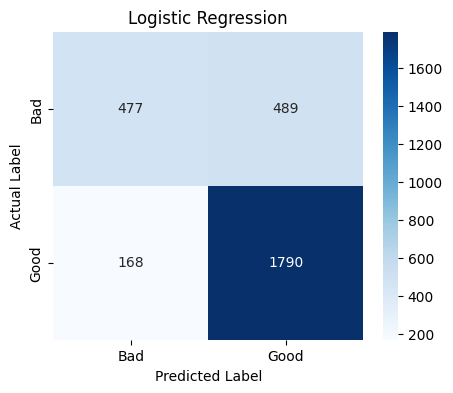

In [54]:
evaluate_model(lr, X_test_tfidf, y_test, 'Logistic Regression')

----Naive Bayes----
Accuracy Score:  0.7537619699042407
Precision Score:  0.7380769230769231
Recall Score:  0.9800817160367722
F1-Score:  0.8420359806932866


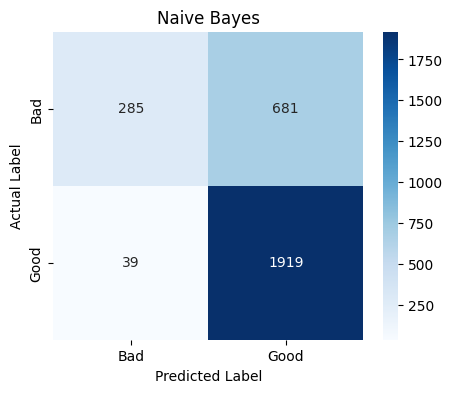

In [55]:
evaluate_model(nb, X_test_tfidf, y_test, 'Naive Bayes')

----Support Vector Machine----
Accuracy Score:  0.7612859097127223
Precision Score:  0.7977315689981096
Recall Score:  0.8621041879468846
F1-Score:  0.8286696121747669


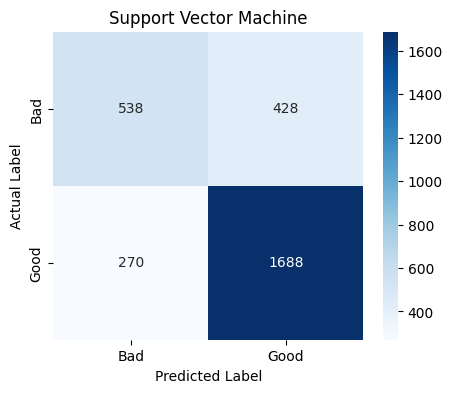

In [56]:
evaluate_model(svm, X_test_tfidf, y_test, 'Support Vector Machine')

# Compare the performance of the three classifiers.

### Three different classifiers were trained to predict whether a course review is good or bad.
- Logistic Regression  
- Naive Bayes
- Support Vector Machine

### The results showed that Logistic Regression achieved the highest accuracy and F1-Score, which indicates overall performance between precision and recall.